In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from helper_functions import separate_continous_discrete, print_correlation_matrix, plot_discrete_variables, plot_continuous_variables, plot_outliers, remove_outlier_iqr, remove_outlier_cutoff_between, plot_categoricals_boxplots

1. Open the categorical dataframe we created before.

In [2]:
categorical_df = pd.read_csv('categorical.csv')
categorical_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month_in_2011
0,BU79786,Washington,0,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate,3,1,Agent,Two-Door Car,Midsize,2
1,QZ44356,Arizona,0,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal,3,3,Agent,Four-Door Car,Midsize,1
2,AI49188,Nevada,0,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal,3,1,Agent,Two-Door Car,Midsize,2
3,WW63253,California,0,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate,2,1,Call Center,SUV,Midsize,1
4,HB64268,Washington,0,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal,1,1,Agent,Four-Door Car,Midsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8285,YM19146,California,0,Premium,College,2011-01-06,Employed,F,Suburban,Single,Personal,2,1,Branch,Four-Door Car,Large,1
8286,PK87824,California,1,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate,3,1,Branch,Four-Door Car,Midsize,2
8287,TD14365,California,0,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate,2,1,Branch,Four-Door Car,Midsize,2
8288,UP19263,California,0,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal,2,3,Branch,Four-Door Car,Large,2


In [3]:
categorical_df.dtypes

customer                      object
state                         object
response                       int64
coverage                      object
education                     object
effective_to_date             object
employmentstatus              object
gender                        object
location_code                 object
marital_status                object
policy_type                   object
policy                         int64
renew_offer_type               int64
sales_channel                 object
vehicle_class                 object
vehicle_size                  object
effective_to_month_in_2011     int64
dtype: object

2. Plot all the categorical variables with the proper plot. What can you see?

In [4]:
# for columns in categorical_df:
#     sns.boxplot(x=categorical_df[columns])
#     plt.show()

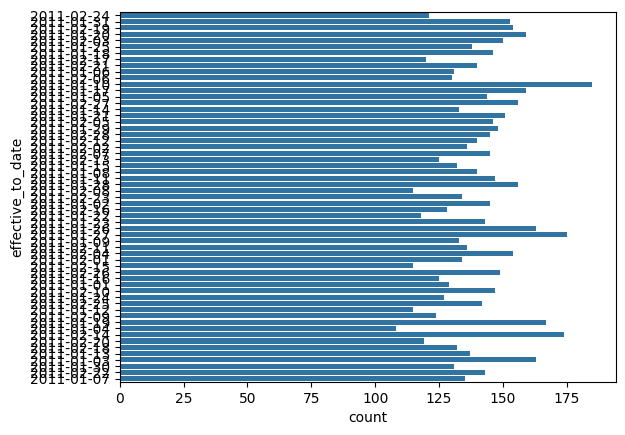

In [5]:
    sns.countplot(data=categorical_df['effective_to_date'])
    plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Make any changes you feel are necessary.   

- nothing is redundant

4. Plot time variable. Can you extract something from it?

In [6]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])
categorical_df.dtypes

customer                              object
state                                 object
response                               int64
coverage                              object
education                             object
effective_to_date             datetime64[ns]
employmentstatus                      object
gender                                object
location_code                         object
marital_status                        object
policy_type                           object
policy                                 int64
renew_offer_type                       int64
sales_channel                         object
vehicle_class                         object
vehicle_size                          object
effective_to_month_in_2011             int64
dtype: object

5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [7]:
categorical_df['CW'] = categorical_df['effective_to_date'].dt.isocalendar().week
display(categorical_df['CW'].unique())
display(categorical_df.head())

<IntegerArray>
[8, 5, 7, 3, 4, 1, 2, 9, 6, 52]
Length: 10, dtype: UInt32

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month_in_2011,CW
0,BU79786,Washington,0,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate,3,1,Agent,Two-Door Car,Midsize,2,8
1,QZ44356,Arizona,0,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal,3,3,Agent,Four-Door Car,Midsize,1,5
2,AI49188,Nevada,0,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal,3,1,Agent,Two-Door Car,Midsize,2,7
3,WW63253,California,0,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate,2,1,Call Center,SUV,Midsize,1,3
4,HB64268,Washington,0,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal,1,1,Agent,Four-Door Car,Midsize,2,5


In [8]:

categorical_df.groupby(['vehicle_size', 'vehicle_class']).size().reset_index()

,vehicle_size,vehicle_class,0
0,Large,Four-Door Car,452
1,Large,Luxury Car,11
2,Large,Luxury SUV,11
3,Large,SUV,146
4,Large,Sports Car,44
5,Large,Two-Door Car,207
6,Midsize,Four-Door Car,3031
7,Midsize,Luxury Car,68
8,Midsize,Luxury SUV,61
9,Midsize,SUV,1151


In [9]:
categorical_df.to_csv('categorical.csv', index=False)